### Check input files



In [29]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


datasets/test.csv
datasets/sample.csv
datasets/train.csv


### Import train data and create DataFrame object

In [30]:
train = pd.read_csv('datasets/train.csv')
print("The files have been imported")

The files have been imported


### Find and display unique data
#### This function is used to search a Data Frame and then display unique values for each feature. Thanks to this, you can find features that have the same values, e.q: `OnlineSecurity` which contains the answers: 'Yes', 'No' and 'No internet service'.

In [31]:
def printUniqueValues(dataToCheck):
    for column in dataToCheck:
        uniqueValues = dataToCheck[column].unique()
        uniqueCount = len(uniqueValues)
        print(f"{column} = {uniqueValues} = {uniqueCount}")


printUniqueValues(train)


customerID = ['9763-PDTKK' '1116-FRYVH' '9102-IAYHT' ... '5274-XHAKY' '3451-VAWLI'
 '8270-RKSAP'] = 5634
gender = ['Female' 'Male'] = 2
SeniorCitizen = [0 1] = 2
Partner = ['No' 'Yes'] = 2
Dependents = ['No' 'Yes'] = 2
tenure = [ 4 48 17 38  7  5  6 11 22 35 68 56 31 43  2 25 54 10 24 46 20 72 12 27
 60 69 66 14 64 37 39  9  3 71  1 53 51 16 44 42  8 13 65 28 45 67 61 70
 32 52 29 49 41 23 33 30 58 36 21 26 40 19 59 57 50 15 55 18 63 47 62 34
  0] = 73
PhoneService = ['Yes' 'No'] = 2
MultipleLines = ['No' 'No phone service' 'Yes'] = 3
InternetService = ['Fiber optic' 'DSL' 'No'] = 3
OnlineSecurity = ['Yes' 'No' 'No internet service'] = 3
OnlineBackup = ['No' 'Yes' 'No internet service'] = 3
DeviceProtection = ['Yes' 'No' 'No internet service'] = 3
TechSupport = ['Yes' 'No' 'No internet service'] = 3
StreamingTV = ['No' 'No internet service' 'Yes'] = 3
StreamingMovies = ['Yes' 'No' 'No internet service'] = 3
Contract = ['Month-to-month' 'Two year' 'One year'] = 3
PaperlessBilling = ['Ye

### DataFrame information
#### The `info()` method provides us a basic information about featurs, like: feature's amout of data (how many values are NaN values) and the types of data (e.q int or float). It is very important information for future data processing beacuse, e.q: fetures which contains variables of type 'int' will be labeled differently than features which contains variables of type 'float'.

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


### Feature with the same unique value
#### After find specific feature with the same unique value, we connected 'No' and 'No internet service' in one value: 'No'. We decided for this operation, because, people can recognioze that 'No' and 'No internet service' is the same piece of information, but model will be interpret this value as a diffrent value. So, from model perspectiv, it can overload the model and deteriorate the learning process. In order to facilitate the learning process and reduce unnecessary variables, we have decided to take this step.

In [33]:
def makeOnlyYesNo(dataToTransform):
    columnToTransform = ['OnlineSecurity', 'OnlineBackup', 'MultipleLines',
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for colKey in columnToTransform:
        dataToTransform[colKey] = dataToTransform[colKey].map(
            lambda i: 'Yes' if i == 'Yes' else 'No')

    return dataToTransform


### Encode and scale
#### In this step, unique value for each feature are labeled. Due to fact that, `LabelEncoder` cannot labeled numeric value, we divided the features into those with numerical values and those with string values. For feature with numeric values we use `StandardScaler`. `StandardScaler` calculate standard score of sample x using formula provided in Equation provided below. `StandardScaler` removing the mean and scaling to unit variance. 

$$z = \frac{(x - u)}{s}$$

where:\
u  - the mean of the samples.

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

numericColumntoTransform = ['tenure', 'MonthlyCharges', 'TotalCharges']
columnToTransform = ['gender',
                     'SeniorCitizen',
                     'Partner',
                     'Dependents',
                     'PhoneService',
                     'MultipleLines',
                     'InternetService',
                     'OnlineSecurity',
                     'OnlineBackup',
                     'DeviceProtection',
                     'TechSupport',
                     'StreamingTV',
                     'StreamingMovies',
                     'Contract',
                     'PaperlessBilling',
                     'PaymentMethod']

le_dict = {col: LabelEncoder() for col in columnToTransform}
ss_dict = {col: StandardScaler() for col in numericColumntoTransform}


def encodeAndScale(dataToTransform, learning):
    if learning:
        for col in columnToTransform:
            dataToTransform[col] = le_dict[col].fit_transform(
                dataToTransform[col])
    else:
        for col in columnToTransform:
            dataToTransform[col] = le_dict[col].transform(dataToTransform[col])

    for colKey in numericColumntoTransform:
        if learning:
            dataToTransform[colKey] = ss_dict[colKey].fit_transform(
                np.array(dataToTransform[colKey]).reshape(-1, 1))
        else:
            dataToTransform[colKey] = ss_dict[colKey].transform(
                np.array(dataToTransform[colKey]).reshape(-1, 1))

    return dataToTransform


#### `TotalCharges` didn't show up, it means there might be some trash in this column (other than NaN, like empty strings)

In [35]:
def handleTotalCharges(dataToTransform):
    dataToTransform['TotalCharges'] = pd.to_numeric(
        train['TotalCharges'], downcast="float", errors='coerce').fillna(train['MonthlyCharges']*train['tenure'])
    return dataToTransform


### Conversion of data types to the minimum necessary

In [36]:
def lowerTypes(dataToTransform):
    columnDoubleToFloat = ['tenure', 'MonthlyCharges', 'TotalCharges']
    for colKey in columnDoubleToFloat:
        dataToTransform[colKey] = dataToTransform[colKey].astype('float32')

    for column in dataToTransform:
        uniqueValues = dataToTransform[column].unique()
        uniqueCount = len(uniqueValues)
        if(uniqueCount > 0 and uniqueCount < 6):
            dataToTransform[column] = dataToTransform[column].astype('int8')
    return dataToTransform


### Processing the dataset before training the model
#### We drop `customerID` and `gender` feature from DataFrame, beacuse they have low correlation with `Churn`. We use previously defined functions for preprocessing.

In [37]:
def preprocess(dataToTransform, learning):
    dataToTransform = handleTotalCharges(dataToTransform)
    dataToTransform = makeOnlyYesNo(dataToTransform)
    dataToTransform = encodeAndScale(dataToTransform, learning)
    dataToTransform = lowerTypes(dataToTransform)
    return dataToTransform


### Preprocess training data.

In [38]:
labels = train['Churn']
train = preprocess(train, True)
display(train)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9763-PDTKK,0,0,0,0,-1.145235,1,0,1,1,...,1,1,0,1,0,1,0,0.982040,-0.830938,1
1,1116-FRYVH,0,0,1,1,0.642149,0,0,0,1,...,0,1,0,0,2,0,3,-0.852216,-0.127695,0
2,9102-IAYHT,0,0,1,1,-0.617144,1,1,1,0,...,0,0,0,1,0,1,2,0.683556,-0.360592,1
3,2921-XWDJH,0,1,1,0,0.235926,1,0,1,1,...,0,0,0,1,0,1,2,0.616856,0.388651,0
4,2026-TGDHM,0,0,0,0,-1.023368,1,0,1,0,...,0,0,0,1,0,1,2,0.478453,-0.770864,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0248-IPDFW,0,0,0,0,-1.267102,1,1,0,0,...,0,0,0,0,0,1,2,-0.495370,-0.979899,0
5630,2272-WUSPA,0,0,1,0,1.617086,1,1,1,1,...,1,0,1,1,2,1,2,1.527314,2.423349,0
5631,5274-XHAKY,0,0,1,1,0.357793,1,1,1,1,...,0,0,1,0,0,1,0,0.978705,0.718499,0
5632,3451-VAWLI,0,0,1,1,0.114058,1,0,2,0,...,0,0,0,0,2,0,1,-1.509213,-0.679282,0


### Heatmap
#### Heatmap provide us information on how much the individual features are interpedent. Based on heatmap, we droped the feature that are high corelated with each other, beacuse, such data do not provide additional information and can increase the model load. For example, we drop `TotalCharges` because it's has high corellation with `MonthlyCharges`.

<AxesSubplot:>

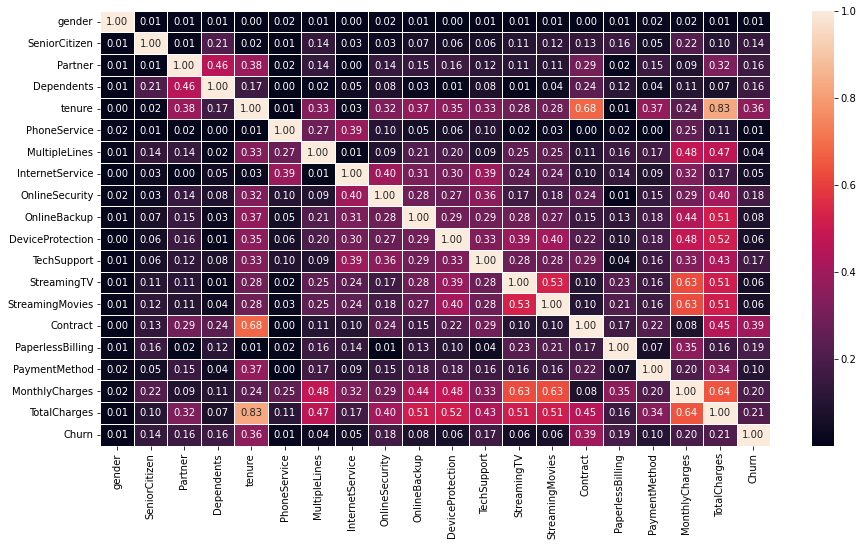

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(abs(train.corr()), annot=True, linewidths=0.5, fmt='.2f', ax=ax)

### Drop unnecessary features

In [40]:
def dropUnnecessaryFeatures(dataToTransform, isLearning):
    dataToTransform = dataToTransform.drop(['gender'], axis=1)
    dataToTransform = dataToTransform.drop(['customerID'], axis=1)
    if isLearning:
        dataToTransform = dataToTransform.drop(['Churn'], axis=1)
    return dataToTransform


train = dropUnnecessaryFeatures(train, True)


### Control which one use

In [41]:
import tensorflow as tf


tf.config.list_physical_devices("GPU")

isGridSearch = False
isLearningData = True
isNeuralNetwork = True
isRFC = False
isMPLC = False


### Selecting features for a neural network model




Neural networks perform better with properly selected features

In [42]:
numeric_columns = ['Contract', 'tenure', 'Dependents', 'MonthlyCharges', 'InternetService', 'PaymentMethod',
                   'TechSupport', 'PhoneService', 'PaperlessBilling', 'OnlineSecurity', 'SeniorCitizen', 'MultipleLines']

if isNeuralNetwork or isMPLC:
    numeric_data = train[numeric_columns]
else:
    numeric_data = train


#### Split into train and test datasets

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    numeric_data, labels, test_size=0.33, random_state=42)

### Models
#### For predictions, we used one neural network model create by us (it consists 3 layers of neurons), one classical neural network - Multilayer Perceptrons (MLP) and Random Forset Classifier. In our assumptions, in addition to the result, we wanted to check which model is best able to cope with the task, that is, it will provide us with the best results. We split our code in 3 different cells containg different model. 

In [44]:
from sklearn.metrics import roc_auc_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline


### Neural Network


In [45]:

# Function to create model, required for KerasClassifier to GridSearchCV
def create_model(optimizer='Adam', init_mode='glorot_uniform', activation='softplus'):
    model = Sequential([
        Dense(256, activation=activation, kernel_initializer=init_mode,
              input_dim=X_train.shape[1]),
        Dense(128, activation=activation, kernel_initializer=init_mode),
        Dense(1, kernel_initializer=init_mode, activation='sigmoid')
    ])

    if(isGridSearch):
        # Grid search have own metrics
        model.compile(loss='binary_crossentropy', optimizer=optimizer)
    else:
        model.compile(loss='binary_crossentropy',
                      optimizer=optimizer,  metrics=['AUC', 'accuracy'])
    return model


if(isNeuralNetwork):
    model = create_model()

    if(isGridSearch):
        model = KerasClassifier(build_fn=create_model)
        batch_size = [32]
        epochs = [50]
        optimizer = ['SGD', 'RMSprop', 'Adagrad',
                     'Adadelta', 'Adam', 'Adamax', 'Nadam']
        init_mode = ['uniform', 'lecun_uniform',
                     'glorot_uniform', 'he_uniform']
        activation = ['softmax', 'softplus', 'softsign',
                      'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
        learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
        beta_1 = [0.9, 0.85, 0.80, 0.75, 0.70]
        momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
        param_grid = dict(batch_size=batch_size, epochs=epochs,
                          init_mode=init_mode, activation=activation, optimizer=optimizer)

        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,
                                   verbose=3, scoring='roc_auc', refit=True, return_train_score=True)
        grid_search.fit(X_train, y_train)
    else:
        if(isLearningData):
            history = model.fit(X_train, y_train, epochs=11,
                                batch_size=32, validation_data=(X_test, y_test))
        else:
            history = model.fit(numeric_data, labels, epochs=11,
                                batch_size=32)

Epoch 1/11
118/118 [==============================] - 1s 3ms/step - loss: 0.4820 - auc: 0.7793 - accuracy: 0.7647 - val_loss: 0.4375 - val_auc: 0.8250 - val_accuracy: 0.7898
Epoch 2/11
118/118 [==============================] - 0s 2ms/step - loss: 0.4338 - auc: 0.8342 - accuracy: 0.7973 - val_loss: 0.4595 - val_auc: 0.8279 - val_accuracy: 0.7812
Epoch 3/11
118/118 [==============================] - 0s 2ms/step - loss: 0.4337 - auc: 0.8339 - accuracy: 0.7891 - val_loss: 0.4362 - val_auc: 0.8285 - val_accuracy: 0.7919
Epoch 4/11
118/118 [==============================] - 0s 2ms/step - loss: 0.4257 - auc: 0.8418 - accuracy: 0.7997 - val_loss: 0.4311 - val_auc: 0.8282 - val_accuracy: 0.7914
Epoch 5/11
118/118 [==============================] - 0s 2ms/step - loss: 0.4317 - auc: 0.8365 - accuracy: 0.7931 - val_loss: 0.4342 - val_auc: 0.8296 - val_accuracy: 0.7930
Epoch 6/11
118/118 [==============================] - 0s 2ms/step - loss: 0.4278 - auc: 0.8395 - accuracy: 0.7984 - val_loss: 0.43

### Random Forest Classifier

Only the best parameters used for grid search are left, but we used many more. 

In [46]:
if(isRFC):
    if(isGridSearch):
        criterion = ["entropy"]
        max_depth = [10]
        min_samples_split = [2]
        min_samples_leaf = [20]
        min_weight_fraction_leaf = [0.0]
        max_features = ['auto']
        max_leaf_nodes = [120]
        min_impurity_decrease = [0.0]
        bootstrap = [True, False]
        n_jobs = [-1]
        random_state = [32]
        class_weight = ['balanced']
        ccp_alpha = [0.0005]
        n_estimators = [400]
        max_samples = [None]

        param_grid = dict(criterion=criterion,
                          max_depth=max_depth,
                          min_samples_split=min_samples_split,
                          min_samples_leaf=min_samples_leaf,
                          min_weight_fraction_leaf=min_weight_fraction_leaf,
                          max_features=max_features,
                          max_leaf_nodes=max_leaf_nodes,
                          min_impurity_decrease=min_impurity_decrease,
                          bootstrap=bootstrap,
                          n_jobs=n_jobs,
                          random_state=random_state,
                          class_weight=class_weight,
                          ccp_alpha=ccp_alpha,
                          n_estimators=n_estimators,
                          max_samples=max_samples)

        grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                                   param_grid=param_grid,
                                   verbose=3,
                                   scoring='roc_auc',
                                   return_train_score=True,
                                   cv=5)
        grid_search.fit(numeric_data, labels)
    else:
        model = RandomForestClassifier(
            criterion='entropy',
            max_depth=10,
            min_samples_split=2,
            min_samples_leaf=20,
            min_weight_fraction_leaf=0.0,
            max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            bootstrap=True,
            n_jobs=-1,
            random_state=32,
            class_weight='balanced',
            ccp_alpha=0.0002,
            n_estimators=400)
        model.fit(numeric_data, labels)


### MLPC

Multi-layer Perceptron classifier.

In [47]:
if(isMPLC):
    if(isGridSearch):
        GRID = [
            {'estimator': [MLPClassifier(random_state=32)],
             'estimator__solver': ['sgd'],
             'estimator__learning_rate_init': [0.0001],
             'estimator__max_iter': [300],
             'estimator__hidden_layer_sizes': [(1024, 512, 512, 256, 128)],
             'estimator__activation': ['relu'],
             'estimator__alpha': [0.0001],
             'estimator__early_stopping': [False],
             'estimator__batch_size': [128, 256],
             'estimator__learning_rate': ['adaptive'],
             'estimator__shuffle': [True]
             }
        ]

        PIPELINE = Pipeline([('scaler', None), ('estimator', MLPClassifier())])

        grid_search = GridSearchCV(estimator=PIPELINE, param_grid=GRID,
                                   scoring='roc_auc',
                                   n_jobs=-1, cv=3, refit=True, verbose=1,
                                   return_train_score=False)

        grid_search.fit(X_train, y_train)
    else:
        model = MLPClassifier(random_state=32, max_iter=300, solver='sgd', learning_rate_init=0.001, hidden_layer_sizes=(500, 400, 300, 200, 100),
                              activation='relu', alpha=0.001, early_stopping=False)

        if isLearningData:
            history = model.fit(X_train, y_train)
        else:
            history = model.fit(numeric_data, labels)


#### Results

In [48]:
isAnyModel = isNeuralNetwork or isRFC or isMPLC

if isAnyModel:
    if isGridSearch:
        model = grid_search
        
    if isNeuralNetwork:
        X_train_preds = model.predict(X_train)
        X_test_preds = model.predict(X_test)
    else:
        X_train_preds = model.predict_proba(X_train)[:, 1]
        X_test_preds = model.predict_proba(X_test)[:, 1]

    X_train_preds_acc = model.predict(X_train)
    X_test_preds_acc = model.predict(X_test)
    
    print('Train auc:', roc_auc_score(y_train, X_train_preds))
    print('Test auc:', roc_auc_score(y_test, X_test_preds))
    if not isNeuralNetwork or isGridSearch:
        print('\n')
        print('Train accuracy: ', accuracy_score(y_train, X_train_preds_acc))
        print('Test accuracy: ', accuracy_score(y_test, X_test_preds_acc))


Train auc: 0.8514218954082065
Test auc: 0.8308432547011226


### Print best grid search
#### `Grid search` was used for find the best hipher paramaeters for out model. 

In [49]:
if isGridSearch:
    print('Best score:', grid_search.best_score_,
          '\nBest params:', grid_search.best_params_)
    print('\n\n\n')
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    params = grid_search.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))


### Plotting the ROC Curve


A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
The true-positive rate is also known as sensitivity or probability of detection. The false-positive rate is also known as probability of false alarm and can be calculated as sensitivity. The ROC curve is thus the sensitivity as a function of fall-out. In general, if the probability distributions for both detection and false alarm are known, the ROC curve can be generated by plotting the cumulative distribution function of the detection probability in the y-axis versus the cumulative distribution function of the false-alarm probability on the x-axis.

In [50]:
from sklearn import metrics


def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                             drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


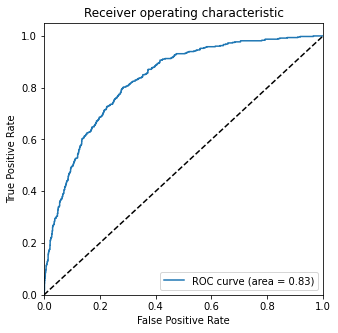

In [51]:
if isAnyModel:
    draw_roc(y_test, X_test_preds)


In [52]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


def plot_learning_history(modelHistory, epochs_num=None):
    if epochs_num:
        x = np.arange(epochs_num)
    else:
        x = None
    history = modelHistory.history

    try:
        if not isLearningData:
            hist = [
                go.Scatter(x=x, y=history["auc"], name="Train AUC", marker=dict(
                    size=5), yaxis='y2'),
                go.Scatter(x=x, y=history["loss"],
                           name="Train Loss", marker=dict(size=5)),
            ]
        else:
            hist = [
                go.Scatter(x=x, y=history["accuracy"], name="Train Accuracy", marker=dict(
                    size=5), yaxis='y3'),
                go.Scatter(x=x, y=history["val_accuracy"], name="Test Accuracy", marker=dict(
                    size=5), yaxis='y3'),
                go.Scatter(x=x, y=history["auc"], name="Train AUC", marker=dict(
                    size=5), yaxis='y2'),
                go.Scatter(x=x, y=history["val_auc"], name="Test AUC", marker=dict(
                    size=5), yaxis='y2'),
                go.Scatter(x=x, y=history["loss"],
                           name="Train Loss", marker=dict(size=5)),
                go.Scatter(x=x, y=history["val_loss"],
                           name="Test Loss", marker=dict(size=5))
            ]
    except:
        if not isLearningData:
            hist = [
                go.Scatter(x=x, y=history["auc"], name="Train AUC", marker=dict(
                    size=5), yaxis='y2'),
                go.Scatter(x=x, y=history["loss"],
                           name="Train Loss", marker=dict(size=5)),
            ]
        else:
            hist = [
                go.Scatter(x=x, y=history["acc"], name="Train Accuracy", marker=dict(
                    size=5), yaxis='y2'),
                go.Scatter(x=x, y=history["val_acc"], name="Test Accuracy", marker=dict(
                    size=5), yaxis='y2'),
                go.Scatter(x=x, y=history["loss"],
                           name="Train Loss", marker=dict(size=5)),
                go.Scatter(x=x, y=history["val_loss"],
                           name="Test Loss", marker=dict(size=5))
            ]

    layout = go.Layout(
        title="Model Training Evolution", font=dict(family='Palatino'), xaxis=dict(title='Epoch', dtick=1),
        yaxis1=dict(title="Loss", domain=[0, 0.35]), yaxis2=dict(title="Accuracy", domain=[0.4, 0.70]), yaxis3=dict(title="AUC", domain=[0.75, 1])
    )
    py.iplot(go.Figure(data=hist, layout=layout), show_link=False)


### Learning history 
#### `plot_learning_history()` give us information about . We use it for find optimal number of epochs. History show us information about overfitting model. Chart with loss shows how the model learns, it means that if there are large fluctuations, the model is overloaded. In the model, the learning rate should be increased or the number of epochs should be increased. To sum up, model history shows us in what direction the model is heading and whether it is developing.

In [53]:
if not isGridSearch and isNeuralNetwork:
    plot_learning_history(history)


#### Use trained model to predic samples from `test.csv` and save the results in new file

In [57]:
if isAnyModel:
    test = pd.read_csv('datasets/test.csv')
    sample_submission = pd.read_csv('datasets/sample.csv')
    test = preprocess(test, False)
    test = dropUnnecessaryFeatures(test, False)

    if isNeuralNetwork:
        test = test[numeric_columns]
    else:
        test = test
    
    if not isNeuralNetwork:
        sample_submission["Churn"] = model.predict_proba(test)[:, 1]
    else:
        sample_submission["Churn"] = model.predict(test)
    sample_submission.to_csv('benchmark.csv', index=False)
    print("Ready")


Ready


### Best scores
|The best public score| The best private score | Model |
|---------------------|------------------------|-------|
|0.85006              |   0.84186              | MLPC	 |
|0.85245              |   0.84056              | RFC   |
|0.85012              |   0.84414          	  | Neural Network|

#### The data presented in the table shows that the RFC fared best in the public data, while the models based on neural networks turned out to be non-competitive when it comes to predicting the results. 